# 🧪 Model Evaluation - Titanic ML Classifier

This notebook focuses on evaluating baseline and advanced models for the Titanic survival prediction task.

We will:
- Train a baseline Logistic Regression model
- Evaluate performance using accuracy, precision, recall, F1
- Visualize the confusion matrix
- Plot ROC curve and calculate AUC
- Explore feature importance with a Random Forest

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

## 📂 Load Processed Dataset
We use the cleaned dataset produced in the EDA stage. Make sure `eda.ipynb` was run and saved properly.

In [6]:
# Load processed data (adjust path if needed)
df = pd.read_csv("data/processed/processed_titanic.csv")
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_1,Embarked_1,Embarked_2,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,1,0,7.2500,2,0,True,False,True,False,True,False,False
1,1,1,38.0,1,0,71.2833,2,0,False,False,False,False,False,True,False
2,1,3,26.0,0,0,7.9250,1,1,False,False,True,True,False,False,False
3,1,1,35.0,1,0,53.1000,2,0,False,False,True,False,False,True,False
4,0,3,35.0,0,0,8.0500,1,1,True,False,True,False,True,False,False


## ✂️ Train/Test Split
We split the data into training and testing sets (80/20).

In [7]:
X = df.drop(columns=["Survived", "Name", "Ticket", "Cabin"], errors="ignore")
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## ⚖️ Logistic Regression (Baseline Model)
We train a simple Logistic Regression as our baseline model.

In [9]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

## 📊 Classification Report
Shows precision, recall, F1-score, and accuracy.

In [10]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



## 🔲 Confusion Matrix
Visual representation of predictions vs. actual values.

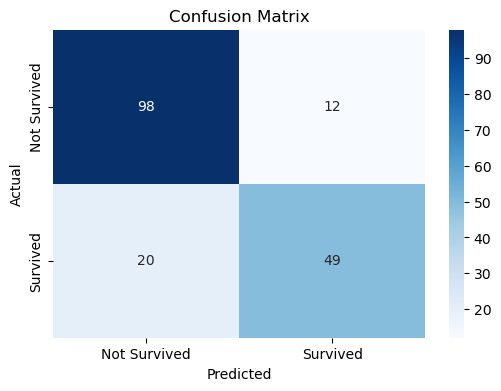

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 📈 ROC Curve & AUC
Receiver Operating Characteristic curve with AUC score.

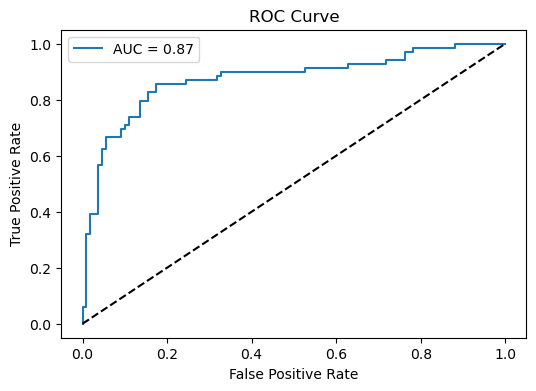

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 🌲 Feature Importance (Random Forest)
Which features contribute the most to survival predictions?

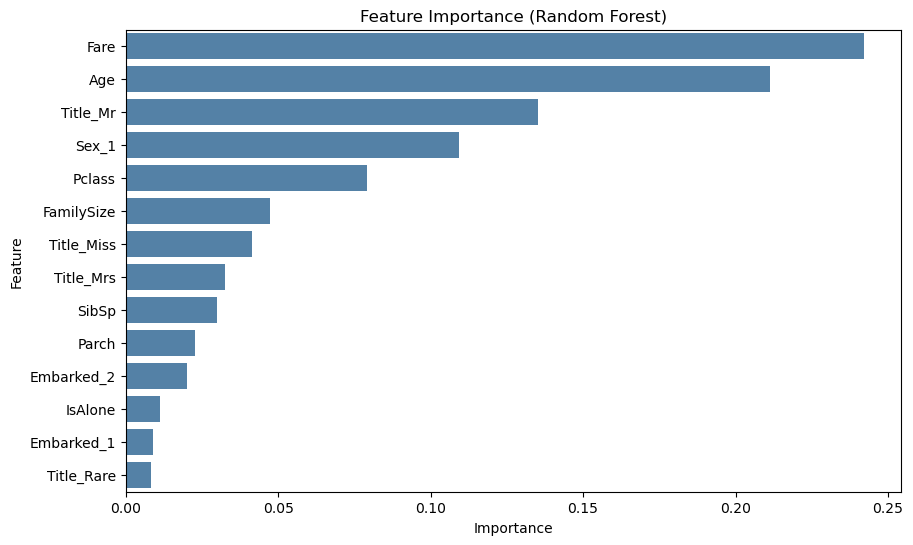

In [15]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index, color="steelblue")  # simpler, avoids warning
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()

# ✅ Conclusions

- Logistic Regression provides a simple but effective baseline.
- Confusion Matrix and Classification Report highlight model strengths and weaknesses.
- ROC/AUC shows discrimination capability between classes.
- Random Forest feature importance gives insight into which passenger attributes matter most for survival.